In [95]:
########################################################## CARCINOMA ##########################################################

In [96]:
########################################################## CARCINOMA ##########################################################

In [47]:
# Importing the libraries and the modules needed
import tensorflow as tf
import tensorflow.python.framework.dtypes
import keras
import keras.backend
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [12]:
################################################### LOGISTIC REGRESSION MODEL ##################################################

In [13]:
# Reading content inside the two CSV files inside the same folder and assigning the read stream to variables
features = pd.read_csv('matrix_of_features_x.csv')
labels = pd.read_csv('matrix_of_labels_y.csv')

In [14]:
# Standardizing the data points, by putting them on a scale
features = preprocessing.scale(features)

In [15]:
# Splitting both datasets into training and testing dataframes with testing data size 20% and the rest being userd for training
xtr, xts, ytr, yts = train_test_split(features, labels, test_size = 0.2)

In [16]:
# Constructing the logistic Regression Model using a Neural Network
model = Sequential()
model.add(Dense(21, input_shape = (30, ), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [17]:
# Defining an Early Stopper that will train our model in 2000 epochs
estop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 15, verbose = 1, mode = 'min')
fitted_model = model.fit(xtr, ytr, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [estop])
history = fitted_model.history
print(fitted_model.history.keys())

Epoch 00079: early stopping
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

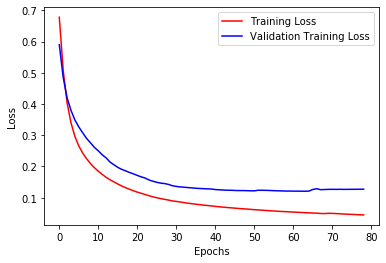

<Figure size 432x288 with 0 Axes>

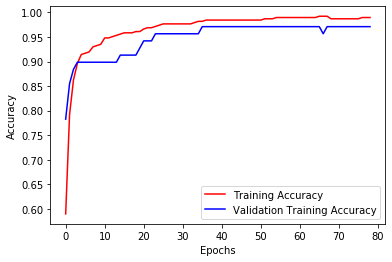

In [18]:
# Plotting the loss of Training and Validation dataframes over the epochs
loss = history['loss']
plt.figure()
val_loss = history['val_loss']
plt.figure()
plt.plot(loss, 'r', label = 'Training Loss')
plt.plot(val_loss, 'b', label = 'Validation Training Loss')
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Plotting the accuracy of Training and Validation dataframes over the epochs
acc = history['accuracy']
plt.figure()
val_acc = history['val_accuracy']
plt.figure()
plt.plot(acc, 'r', label = 'Training Accuracy')
plt.plot(val_acc, 'b', label = 'Validation Training Accuracy')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [19]:
# Calculating the loss and accuracy of data tested
loss, acc = model.evaluate(xts, yts)
print("Testing Data Loss: ", loss)
print("Testing Data Accuracy: ", acc)

114/114 [==============================] - 0s 70us/step
Testing Data Loss:  0.03871355323415054
Testing Data Accuracy:  0.9912280440330505


In [20]:
# Calculating the AUC score of Testing data
yts_pred = model.predict_proba(xts)
fal_pos_rate, tru_pos_rate, thresh = roc_curve(yts, yts_pred)
auc_krs = auc(fal_pos_rate, tru_pos_rate)
print('Testing Data AUC: ', auc_krs)

Testing Data AUC:  1.0


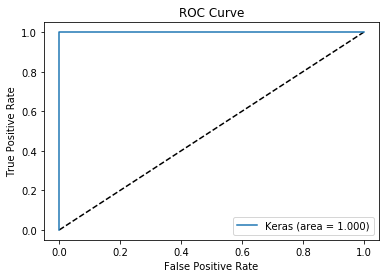

In [21]:
# Plotting the ROC curve of Testing data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fal_pos_rate, tru_pos_rate, label = 'Keras (area = {:.3f})'.format(auc_krs))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [22]:
# Calculating the AUC score of Training data
ytr_pred = model.predict_proba(xtr)
fal_pos_rate, tru_pos_rate, thresh = roc_curve(ytr, ytr_pred)
auc_krs = auc(fal_pos_rate, tru_pos_rate)
print('Training Data AUC: ', auc_krs)

Training Data AUC:  0.9973786305966237


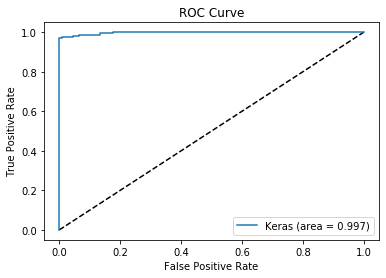

In [23]:
# Plotting the ROC curve of Training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fal_pos_rate, tru_pos_rate, label='Keras (area = {:.3f})'.format(auc_krs))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [24]:
############################################# SOFTMAX REGRESSION MODEL #########################################################

In [25]:
# Converting Matrix of Labels Y into categorical type of data
ytr_categ = to_categorical(ytr)

In [26]:
print(ytr)

     1
504  0
331  0
365  1
121  1
421  0
..  ..
490  0
484  0
67   0
81   1
212  1

[454 rows x 1 columns]


In [27]:
print(ytr_categ)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [28]:
# Constructing the Softmax Regression Model using a Neural Network
model = Sequential()
model.add(Dense(21, input_shape = (30, ), activation = 'softmax'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.0001), metrics = ['accuracy'])

In [29]:
# Defining an Early Stopper that will train our model in 2000 epochs
estop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 15, verbose = 1, mode = 'min')
fitted_model = model.fit(xtr, ytr_categ, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [estop])
history = fitted_model.history
print(fitted_model.history.keys())

Epoch 01074: early stopping
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

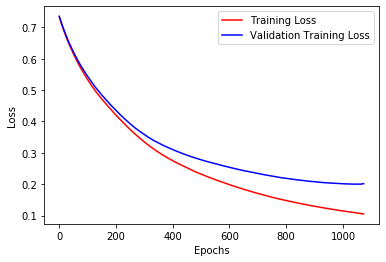

<Figure size 432x288 with 0 Axes>

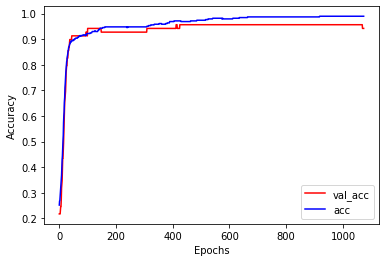

In [30]:
# Plotting the loss of Training and Validation dataframes over the epochs
loss = history['loss']
plt.figure()
val_loss = history['val_loss']
plt.figure()
plt.plot(loss, 'r', label = 'Training Loss')
plt.plot(val_loss, 'b', label = 'Validation Training Loss')
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Plotting the accuracy of Training and Validation dataframes over the epochs
acc = history['accuracy']
plt.figure()
val_acc = history['val_accuracy']
plt.figure()
plt.plot(val_acc, 'r', label = 'val_acc')
plt.plot(acc, 'b', label = 'acc')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [31]:
# Calculating the loss and accuracy of data tested
yts_cat = to_categorical(yts)
loss, acc = model.evaluate(xts, yts_cat)
print("Test Loss: ", loss)
print("Test Accuracy: ", acc)

114/114 [==============================] - 0s 70us/step
Test Loss:  0.09436892574293572
Test Accuracy:  1.0


In [32]:
# Calculating the AUC score of Testing data
yts_pred = model.predict_proba(xts)
fal_pos_rate, tru_pos_rate, thresh = roc_curve(yts, yts_pred[:,1])
auc_krs = auc(fal_pos_rate, tru_pos_rate)
print('Testing data AUC: ', auc_krs)

Testing data AUC:  1.0


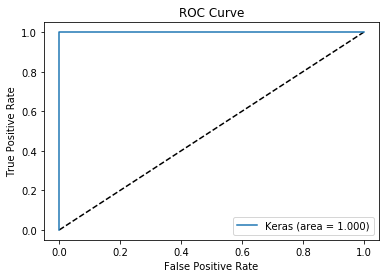

In [33]:
# Plotting the ROC curve of Testing data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fal_pos_rate, tru_pos_rate, label = 'Keras (area = {:.3f})'.format(auc_krs))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [34]:
# Calculating the AUC score of Training data
ytr_pred = model.predict_proba(xtr)
fal_pos_rate, tru_pos_rate, thresh = roc_curve(ytr, ytr_pred[:,1])
auc_krs = auc(fal_pos_rate, tru_pos_rate)
print('Testing data AUC: ', auc_krs)

Testing data AUC:  0.994023277760302


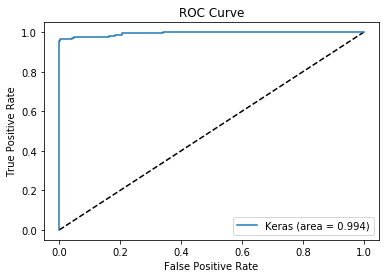

In [35]:
# Plotting the ROC curve of Training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fal_pos_rate, tru_pos_rate, label = 'Keras (area = {:.3f})'.format(auc_krs))
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
###################################### DEEP LEARNING SOFTMAX REGRESSION MODEL ##################################################

In [37]:
# Constructing a Deep Learning Softmax Regression Model using a Neural Network
model = Sequential()
model.add(Dense(21, input_shape = (30, ), activation = 'softmax'))
model.add(Dense(21, activation = 'softmax'))
model.add(Dense(21, activation = 'softmax'))
model.add(Dense(21, activation = 'softmax'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [38]:
# Defining an Early Stopper that will train our model in 3000 epochs
estop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20, verbose = 1, mode = 'min')
fitted_model = model.fit(xtr, ytr_categ, epochs = 3000, validation_split = 0.1, shuffle = True, verbose = 0, callbacks = [estop])
history = fitted_model.history
print(fitted_model.history.keys())

Epoch 00107: early stopping
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

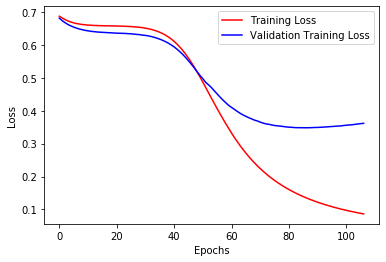

<Figure size 432x288 with 0 Axes>

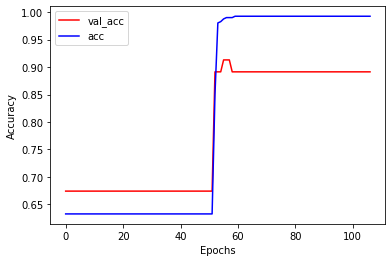

In [39]:
# Plotting the loss of Training and Validation dataframes over the epochs
loss = history['loss']
plt.figure()
val_loss = history['val_loss']
plt.figure()
plt.plot(loss, 'r', label = 'Training Loss')
plt.plot(val_loss, 'b', label = 'Validation Training Loss')
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")

# Plotting the accuracy of Training and Validation dataframes over the epochs
acc = history['accuracy']
plt.figure()
val_acc = history['val_accuracy']
plt.figure()
plt.plot(val_acc, 'r', label = 'val_acc')
plt.plot(acc, 'b', label = 'acc')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

In [40]:
# Calculating the loss and accuracy of data tested
yts_cat = to_categorical(yts)
loss, acc = model.evaluate(xts, yts_cat)
print("Test Loss: ", loss)
print("Test Accuracy: ", acc)

114/114 [==============================] - 0s 70us/step
Test Loss:  0.09015342436338726
Test Accuracy:  0.9912280440330505


In [41]:
# Calculating the AUC score of Testing data
yts_pred = model.predict_proba(xts)
fal_pos_rate, tru_pos_rate, thresh = roc_curve(yts, yts_pred[:,1])
auc_krs = auc(fal_pos_rate, tru_pos_rate)
print('Testing data AUC: ', auc_krs)

Testing data AUC:  0.9993606138107417


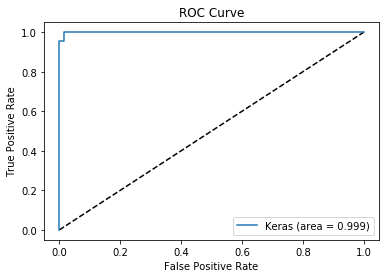

In [42]:
# Plotting the ROC curve of Testing data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fal_pos_rate, tru_pos_rate, label = 'Keras (area = {:.3f})'.format(auc_krs))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [43]:
# Calculating the AUC score of Training data
ytr_pred = model.predict_proba(xtr)
fal_pos_rate, tru_pos_rate, thresh = roc_curve(ytr, ytr_pred[:,1])
auc_krs = auc(fal_pos_rate, tru_pos_rate)
print('Testing data AUC: ', auc_krs)

Testing data AUC:  0.9913180245360176


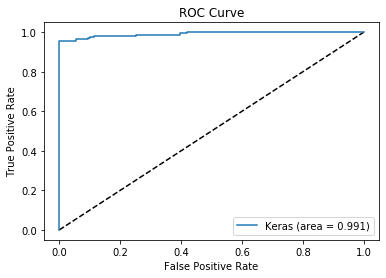

In [44]:
# Plotting the ROC curve of Training data
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fal_pos_rate, tru_pos_rate, label = 'Keras (area = {:.3f})'.format(auc_krs))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [45]:
########################################################### THE END ###########################################################